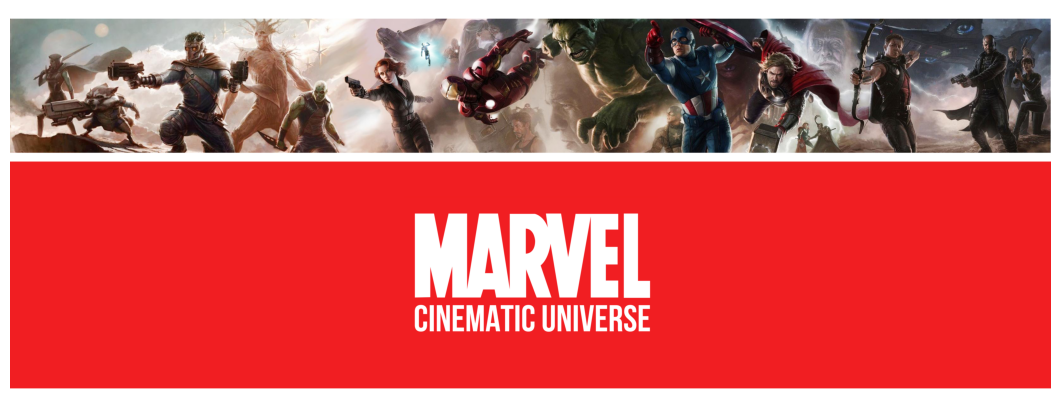

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/ASUS/Documents/Python Scripts/Dataset/marvel_cinematic_universe___banner_by_mrsteiners_d77vtby.png')
plt.figure(figsize=(16,5))
plt.imshow(img, extent=[0, img.shape[1], img.shape[0], 0])
plt.axis('off')
plt.show()

image:MrSteiners

# MCU MOVIES ANALYZE
   BY : Elza Fr

The MCU has become part of the world's largest pop culture. of course this makes the MCU's valuation very large through films, comics, games, and other merchandise. it would be very interesting if I tried to analyze what happened to the MCU projects, especially the films.

therefore this analysis will explain how the performance of the MCU films and how the predictions for the next MCU Film.

note: Series doesn't count

In [2]:
# Import Package Needed
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.metrics import mean_squared_error, r2_score
print('Package Setup Complete')

Package Setup Complete


In [3]:
# Reading Data from spesific file location
df = pd.read_csv('Dataset/mcu/movie_info.csv')

In [4]:
# Renaming some columns name become easier to understand
df.rename(columns={'production_budget_in_million_(USD)':'budget',
                   'worldwide_collection_in_million_(USD)':'box_office',
                   'tomato_audience_score':'tomato_audience'}, inplace=True)

In [5]:
# Adding Column
df['mean_score'] = (df['imdb'] + df['tomatometer'] + df['tomato_audience'] + df['metascore'] + df['meta_user_score']) / 5

In [6]:
# Seeing Data info such as missing value or data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_title      32 non-null     object 
 1   release_date     32 non-null     object 
 2   season           32 non-null     object 
 3   phase            32 non-null     int64  
 4   budget           32 non-null     int64  
 5   box_office       32 non-null     float64
 6   tomatometer      32 non-null     float64
 7   tomato_audience  32 non-null     float64
 8   imdb             32 non-null     float64
 9   metascore        32 non-null     float64
 10  meta_user_score  32 non-null     float64
 11  mean_score       32 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 3.1+ KB


In [7]:
# Changing data type from integer to object
df['phase'] = df['phase'].astype('O')
df['year'] = pd.to_datetime(df['release_date']).dt.year.astype('O')

# Plotting Session

The next process for analyzing is plotting. 
The plot plan is basically an arrangement drawing that shows the equipment and supporting facilities (pipe racks, structures, buildings, roads) that are required for the process facility within a battery limit area, which will be designed for independent operation and shutdown. 

the plotting process aims to visualize the data (and finally, for example, to find patterns in the data that would otherwise be difficult to find)

In [8]:
# Defining Variable needed to visualize
amount_perphase = df.groupby('phase').sum()[['budget','box_office']].sort_values('phase',ascending=True)
amount_perseason = df.groupby('season').sum()[['budget','box_office']].sort_values('season',ascending=True)
amount_peryear = df.groupby('year').sum()[['budget','box_office']].sort_values('year',ascending=True)

x1 = np.arange(len(amount_perphase.index))
x2 = np.arange(len(amount_perseason.index))

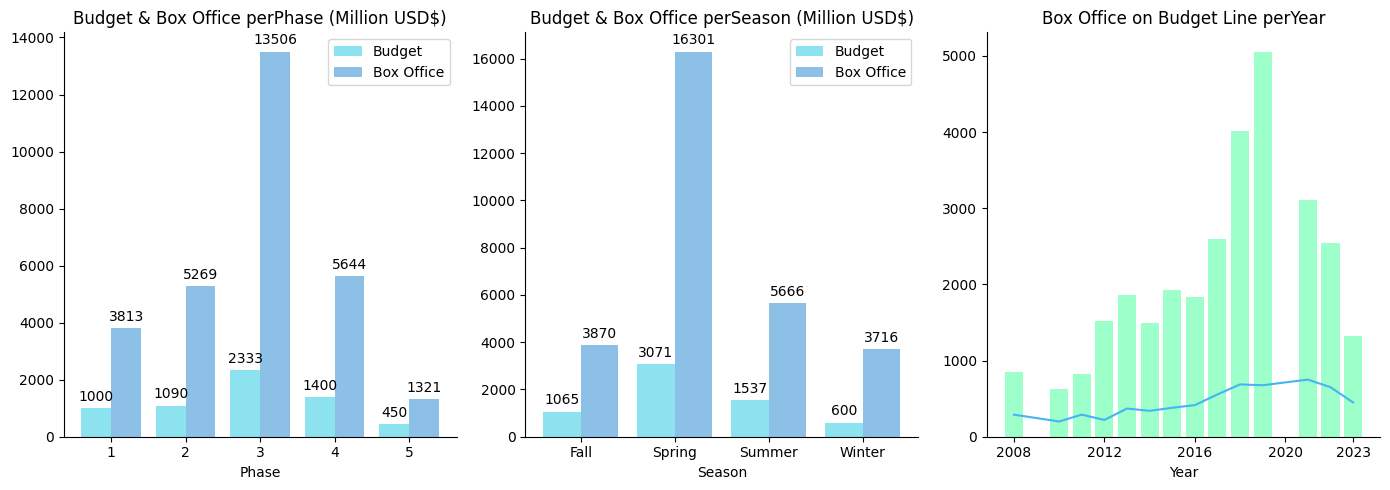

In [9]:
# Build Figure border size
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

def hide_right_bottom_spines(ax):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
gap = 0.2
width = 0.4

# Plot the data for the first bar chart
rects1_set1 = axes[0].bar(x1-gap, amount_perphase['budget'], width, label='Budget', color='#1dc6e0',alpha=.5)
rects2_set1 = axes[0].bar(x1+gap, amount_perphase['box_office'], width, label='Box Office', color='#1d83d1',alpha=.5)
axes[0].set_title('Budget & Box Office perPhase (Million USD$)')
axes[0].set_xlabel('Phase')
axes[0].legend()
axes[0].set_xticks(x1, amount_perphase.index)
hide_right_bottom_spines(axes[0])

# Plot the data for the second bar chart
rects1_set2 = axes[1].bar(x2-gap, amount_perseason['budget'], width, label='Budget', color='#1dc6e0',alpha=.5)
rects2_set2 = axes[1].bar(x2+gap, amount_perseason['box_office'], width, label='Box Office', color='#1d83d1',alpha=.5)
axes[1].set_title('Budget & Box Office perSeason (Million USD$)')
axes[1].set_xlabel('Season')
axes[1].legend()
axes[1].set_xticks(x2, amount_perseason.index)
hide_right_bottom_spines(axes[1])

# Plot the data for the third bar chart
axes[2].plot(amount_peryear.index, amount_peryear['budget'],color='#44b5f2',alpha=1)
axes[2].bar(amount_peryear.index, amount_peryear['box_office'],color='#3dff94',alpha=.5)
axes[2].set_title('Box Office on Budget Line perYear')
axes[2].set_xlabel('Year')
axes[2].set_xticks(ticks=[2008,2012,2016,2020,2023])
hide_right_bottom_spines(axes[2])

# Add labels to the bars for the first set
for rects in [rects1_set1, rects2_set1]:
    for rect in rects:
        height = rect.get_height()
        axes[0].annotate(f'{height:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

# Add labels to the bars for the second set
for rects in [rects1_set2, rects2_set2]:
    for rect in rects:
        height = rect.get_height()
        axes[1].annotate(f'{height:.0f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

# Tighting Between each Plot
plt.tight_layout()
plt.show()

# Analysis for MCU Chart

(until: __Guardian of The Galaxy: Vol.3__)

- Phase

For 5 phase, the MCU Box Office always at least 3 times higher than the Budget, make it almost 300% __Return on Investment (ROI)__ for MCU movies. even tho it's reached its climax in phase 3 which almost 400% ROI, the following phase after that still has a good performance, make it sustainable business for international market.

- Season

MCU Moviees have a good performance for all season, especially in Spring which can maxed out their Box Office performance because "big portions" of investment they did. This good result cannot be separated from Disney's expertise in determining release dates for their films.

- Year

From the chart we can see the following MCU trend from start, mature, and going to saturation point at 2021, and keep going down until 2023. we dont know actually how these trend is going to, but as a entertainment products that are influenced by supply and demand, we can still optimized that the trend will rebound.


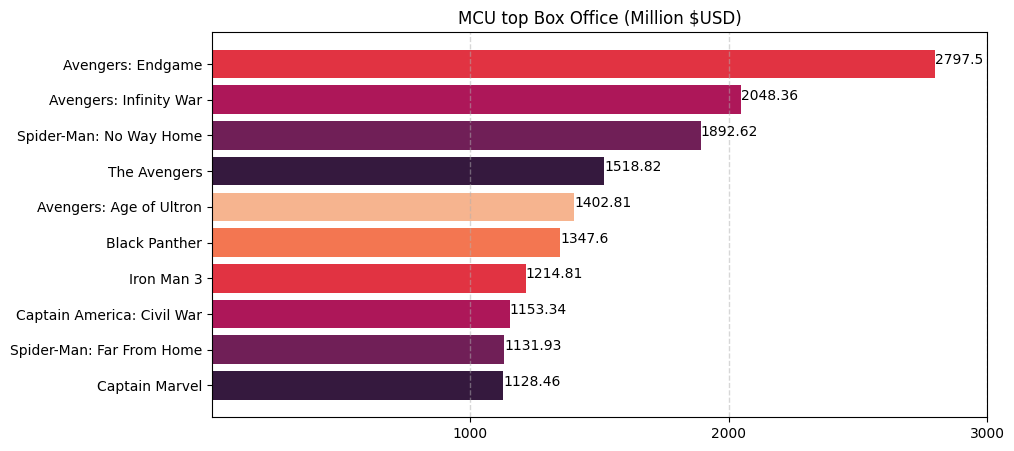

In [10]:
# Plot style Horizontal Bar to find out top 10 MCU Movies based on Box Office in million $USD
top10_box_office = df.groupby('movie_title').sum()[['box_office']].sort_values(by='box_office', ascending=False).head(10)
top10_box_office = top10_box_office.sort_values(by='box_office', ascending=True)
#-------------------------------------------------------------------------------
plt.figure(figsize=(10,5))
colors = sns.color_palette('rocket')

plt.barh(top10_box_office.index, top10_box_office['box_office'], color = colors)

for i, value in enumerate(top10_box_office['box_office']):
    plt.text(value, i, str(value), va='baseline')

plt.grid(linestyle='--', linewidth=1, axis='x', alpha=.5)
plt.xticks(ticks=[1000,2000,3000])
plt.title('MCU top Box Office (Million $USD)')
plt.show()

# Film Criticism

Film criticism is the analysis and evaluation of films and the film medium. In general, film criticism can be divided into two categories: journalistic criticism which appears regularly in newspapers, magazines and other popular mass-media outlets; and academic criticism by film scholars who are informed by film theory and are published in academic journals. Academic film criticism rarely takes the form of a review; instead it is more likely to analyse the film and its place within the history of its genre, or the whole of film history.


Here are the most used and credible film critics as far as the film industry stands :

- Rotten Tomatoes

  Rotten Tomatoes Website has give the Certified Fresh status is a special distinction awarded to the best-reviewed movies   and TV shows. In order to qualify, movies or TV shows must meet the following requirements:
    1. A consistent Tomatometer score of 75% or higher.
    2. At least five reviews from Top Critics.
    3. Films in wide release must have a minimum of 80 reviews. This also applies for films going from limited to wide            release.
    4. Films in limited release must have a minimum of 40 reviews.
    5. Only individual seasons of a TV show are eligible, and each must have a minimum of 20 reviews

  The Audience Score, denoted by a popcorn bucket, represents the percentage of users who have rated a movie or TV show       positively. You can read more about recent changes to the score:
    1. When at least 60% of users give a movie or TV show a star rating of 3.5 or higher, a full popcorn bucket is                displayed to    indicate its Fresh status.
    2. Spilled popcorn bucket
       When less than 60% of users give a movie or TV show a star rating of 3.5 or higher, a tipped over popcorn bucket is        displayed to indicate its Rotten status.
    3. Faded popcorn bucket
       When there is no Audience Score available, which could be because the Title hasn’t released yet or there are not            enough ratings to generate a score.
    4. Checkmark icon
       When you see this next to a review it means we’ve confirmed the user bought a ticket to the movie.
- IMDB

  IMDB, along with Rotten Tomatoes, are perhaps the most well-known and widely used web resource when it comes to getting     film recommendations. Why consult the opinion of a single critic when you can consults hundreds, if not thousands of       individuals. The reputation of these sites has proven so formidable that more often than not, hype generated for a film     can be both amplified and even diminished significantly through the rating system alone.

  However, this system is not entirely accurate in determining a film’s quality. In IMDB, an average rating under 7.0/10 is   often indicative of a film’s mediocrity. This list aims to highlight 10 such films with undeserving ratings under 7,       because they are frankly so much more than mediocre, some even considered by many to be masterpieces, but for now, they     sit at alarmingly low levels on IMDB. Hopefully, this list would give a much needed minor bump to their criminally low     ratings.
  
  
- MetaScore

  Scores are weighted averages. Certain publications are given more significance "because of their stature". Metacritic has   said that it will not reveal the relative weight assigned to each reviewer.

  Games Editor Marc Doyle was interviewed in 2008 by Keith Stuart of The Guardian to "get a look behind the metascoring       process". Stuart wrote: "The Metascore phenomenon, namely Metacritic and GameRankings, have become an enormously           important element of online games journalism over the past few years". Doyle said that because video games lead to a       greater investment of time and money, gamers are more informed about reviews than are fans of film or music; they want to   know "whether that hotly anticipated title is going to deliver".

In [11]:
# depiction on Dataframe with new Index about best Top 10 MCU Movies based on critic score
top10_score = df.groupby(['movie_title','release_date']).sum()[['imdb','tomato_audience','metascore','tomatometer','meta_user_score','mean_score']].sort_values('mean_score', ascending=False).head(10)
top10_score

,,imdb,tomato_audience,metascore,tomatometer,meta_user_score,mean_score
movie_title,release_date,,,,,,
Spider-Man: No Way Home,12/17/2021,8.4,9.8,7.1,9.3,8.6,8.64
Iron Man,5/2/2008,7.9,9.1,7.9,9.4,8.6,8.58
Avengers: Endgame,4/26/2019,8.4,9.0,7.8,9.4,7.9,8.50
Guardians of the Galaxy,8/1/2014,8.0,9.2,7.6,9.2,8.2,8.44
Avengers: Infinity War,4/27/2018,8.4,9.1,6.8,8.5,8.6,8.28
Captain America: The Winter Soldier,4/4/2014,7.8,9.2,7.0,9.0,8.3,8.26
Captain America: Civil War,5/6/2016,7.8,8.9,7.5,9.0,8.0,8.24
Thor: Ragnarok,11/3/2017,7.9,8.7,7.4,9.3,7.8,8.22
The Avengers,5/4/2012,8.0,9.1,6.9,9.1,8.0,8.22


# Preprocessing Data

in the previous stage we have plotted graphic data according to the criteria, then in the next step, what we do is make preparations for the formation of a research model. This contain transforming categoric object value into int, seperate data into train data and test data, forming dependent and independent variable, also decide modelling method which can fit with the data. This step is also known as the preprocessing process.

In [12]:
# Final Data
df_final = df.iloc[:, 2:6]

In [13]:
# Transfrom into Encoder
le = LabelEncoder()
df_final['season'] = le.fit_transform(df_final['season'])
df_final.head(10)

,season,phase,budget,box_office
0,1,1,140,585.37
1,2,1,150,264.77
2,1,1,200,623.93
3,1,1,150,449.33
4,2,1,140,370.57
5,1,1,220,1518.82
6,1,2,200,1214.81
7,0,2,170,644.78
8,1,2,170,714.42
9,2,2,170,773.35


In [14]:
# Indexing Encoding for column encoded
for x, y in zip(df['season'].unique(),df_final['season'].unique()):
    print(f'season_code:',x,'=',y)

season_code: Spring = 1
season_code: Summer = 2
season_code: Fall = 0
season_code: Winter = 3


In [15]:
# Dependent and Independent
x = df_final.drop(['box_office'],axis=1)
y = df_final['box_office']

In [16]:
# Train test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=0)

In [17]:
# Model Selection
lr = LinearRegression()

by the preprocessing process, we decide to :
- transform a value in season column into LabelEncoder.
- make a dependent variable (y), and independent variable (x)
- seperating between data train and data test using method train_test_split.
- input the model using Linear Regression.

# Modelling

here, we want to know how many Box Office that a MCU made in the next movie "The Marvels", that will release soon in November/Fall 2023. So we gonna make the prediction about it. 

in this process, i do the modelling to predict the dependent variabel Box Office, using Independent variable such as Season, Phase, and Budget

The Marvels,
- Season : Fall
- Phase : 5
- Budget Estimated : 200 mil USD
        
        
                                    -IMDB,fresherslive

In [18]:
# Predicition Model. Set the Specific Criteria to variabel below
Season = 0
Phase = 5
Budget = 200

lr = lr.fit(x_train,y_train)
model = lr.predict([[Season,Phase,Budget]])

print('Prediction : ',model,'Million USD$')

Prediction :  [546.25240499] Million USD$


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
print('The Marvels\n',
      '- Season = Fall',
      '\n - Phase =',Phase,
      '\n - Budget =',Budget,'Million USD$',
      '\n - Box Office Prediction = ',model,'Million USD$',)

The Marvels
 - Season = Fall 
 - Phase = 5 
 - Budget = 200 Million USD$ 
 - Box Office Prediction =  [546.25240499] Million USD$


# Evaluation

this is the Evaluation Section that show how much score for the model. Here i using mean_squared_error score to evaluate my model, since i using regession for my modelling.

In [20]:
y_pred = lr.predict(x_test)

In [21]:
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape:.2f}%",
     '\nMean Squared Error :',mean_squared_error(y_test,y_pred))

Mean Absolute Percentage Error: 45.91% 
Mean Squared Error : 298396.96186304814


More specifically, the Mean Absolute Percentage Error (MAPE) is a loss function that defines the error of a given model. The MAPE is calculated by finding the absolute difference between the actual and predicted values, divided by the actual value. These ratios are added for all values and the mean is taken.

in statistics, the Mean Squared Error (MSE) is a risk function that measures the square of errors.

__Thanks For ur Attention, hope this Analyze get u some great insight__